In [1]:
# import dependencies
import pandas as pd
from apiKey import api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# pull data from csv
file_one = "Resources/highest_grossing_movies.csv"
df = pd.read_csv(file_one)

In [3]:
# create a list to loop through the top1000
titles = df['Title'].str[:-7].values.tolist()

In [4]:
# Interacting with the API
url = f'http://www.omdbapi.com/?apikey={api_key}&t='
# make a list to append json data
rt_movies_ls = [] # we'll turn this into a data frame
imdb_movies_ls = []
director_ls = []
actor_ls = []
title_ls = []
year_ls = []
rated_ls = []
length_ls = []

In [5]:
#
for title in titles[:500]:
    try:
        # access json data
        movie_json = requests.get(url + title).json()
        movie_ratings_rt = movie_json['Ratings'][1]['Value']
        movie_ratings_imdb = movie_json['imdbRating']
        movie_director = movie_json['Director']
        movie_actors = movie_json['Actors']
        movie_year = movie_json['Year']
        movie_rating = movie_json['Rated']
        movie_length = movie_json['Runtime']
        #append json to movie_ls list
        rt_movies_ls.append(movie_ratings_rt)
        imdb_movies_ls.append(movie_ratings_imdb)
        director_ls.append(movie_director)
        actor_ls.append(movie_actors)
        title_ls.append(title)
        year_ls.append(movie_year)
        rated_ls.append(movie_rating)
        length_ls.append(movie_length)
    except:
        pass

In [6]:
full_moviels_df = pd.DataFrame()
full_moviels_df['Title'] = title_ls
full_moviels_df['World Sales'] = df['World Sales (in $)']
full_moviels_df['Year Released'] = year_ls
full_moviels_df['Rotten Tomatoes Score'] = rt_movies_ls
full_moviels_df['IMDB Score'] = imdb_movies_ls
full_moviels_df['Director(s)'] = director_ls
full_moviels_df['Headlining Actor(s)'] = actor_ls
full_moviels_df['Studio'] = df['Distributor']
full_moviels_df['Runtime'] = length_ls
full_moviels_df['Rating'] = rated_ls
full_moviels_df['Genre'] = df['Genre']

In [7]:
full_moviels_df.to_csv("Output/Movie_Data.csv")

In [5]:
# pull data
file_2 = "Output/Movie_Data.csv"
full_moviels_df = pd.read_csv(file_2)

# Director Sales, Actor Sales, and Studio Sales

In [6]:
# Bar Graphs on directors  sales, actors  sales,  studio sales,
dir_top_earning_df = pd.DataFrame()
dir_top_earning_df['Director(s)'] = full_moviels_df['Director(s)']
dir_top_earning_df['World Sales'] = full_moviels_df['World Sales']
dir_top_earning_df['Title'] = full_moviels_df['Title']
dir_top_earning_df['Year Released'] = full_moviels_df['Year Released']
dir_top_earning_df = dir_top_earning_df.sort_values(by=['World Sales'], ascending=False)

In [7]:
dir_ls = full_moviels_df["Director(s)"].unique()
#dir_ls
dir_df = full_moviels_df.groupby("Director(s)").agg(world_sales_sum=('World Sales','sum'),world_sales_mean=('World Sales','mean'),total_number_films=('Title','count'))    #{'World Sales':["sum","mean"], 'Title':"count"}
#dir_df = dir_df.reset_index()
dir_df = dir_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
dir_sum_df = dir_df.sort_values(by=['World Sales Sum'], ascending=False)
dir_mean_df = dir_df.sort_values(by=['World Sales Mean'], ascending=False)
dir_num_df = dir_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)
#dir_df["Director Average World Gross per Film"] = (dir_df['World Sales']/dir_df['Title'])
#dir_df.head(10)
#dir_sum_df.dtypes
pd.options.display.float_format = '{:.2f}'.format

In [8]:
dir_sum_df = dir_sum_df.head(15)

In [9]:
dir_mean_df = dir_mean_df.head(15)

In [10]:
dir_num_df = dir_num_df.head(15)

In [11]:
dir_top_earning_df = dir_top_earning_df.head(15)

In [12]:
stu_top_earning_df = pd.DataFrame()
stu_top_earning_df['Studio'] = full_moviels_df['Studio']
stu_top_earning_df['World Sales'] = full_moviels_df['World Sales']
stu_top_earning_df['Title'] = full_moviels_df['Title']
stu_top_earning_df['Year Released'] = full_moviels_df['Year Released']
stu_top_earning_df = stu_top_earning_df.sort_values(by=['World Sales'], ascending=False)

In [13]:
stu_ls = full_moviels_df["Studio"].unique()

stu_df = full_moviels_df.groupby("Studio").agg(world_sales_sum=('World Sales','sum'),world_sales_mean=('World Sales','mean'),total_number_films=('Title','count'))    

stu_df = stu_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
stu_sum_df = stu_df.sort_values(by=['World Sales Sum'], ascending=False)
stu_mean_df = stu_df.sort_values(by=['World Sales Mean'], ascending=False)
stu_num_df = stu_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)


pd.options.display.float_format = '{:.2f}'.format

In [14]:
stu_sum_df = stu_sum_df.head(15)

In [15]:
stu_mean_df = stu_mean_df.head(15)

In [16]:
stu_num_df = stu_num_df.head(15)

In [17]:
stu_top_earning_df = stu_top_earning_df.head(15)

In [18]:
actor_ls = []
hold_ls = []
ws_ls = []
filmindex = -1

hold_gross = full_moviels_df["World Sales"].values

for film in full_moviels_df["Headlining Actor(s)"]:
    actnum = 0
    filmindex = filmindex + 1
    hold_ls = film.split(", ")
    for actor in hold_ls:
        actor_ls.append(actor)
        actnum = actnum + 1
        for i in range (1, actnum):
            ws_ls.append(hold_gross[filmindex])
        
        
actor_df = pd.DataFrame()
actor_df['Actor Name'] = actor_ls
actor_df['World Sales for Film'] = ws_ls

In [19]:
act_df = actor_df.groupby("Actor Name").agg(world_sales_sum=('World Sales for Film','sum'),world_sales_mean=('World Sales for Film','mean'),total_number_films=('World Sales for Film','count'))    

act_df = act_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
act_sum_df = act_df.sort_values(by=['World Sales Sum'], ascending=False)
act_mean_df = act_df.sort_values(by=['World Sales Mean'], ascending=False)
act_num_df = act_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)


pd.options.display.float_format = '{:.2f}'.format

In [20]:
act_sum_df = act_sum_df.head(15)

In [21]:
act_mean_df = act_mean_df.head(15)

In [22]:
act_num_df = act_num_df.head(15)

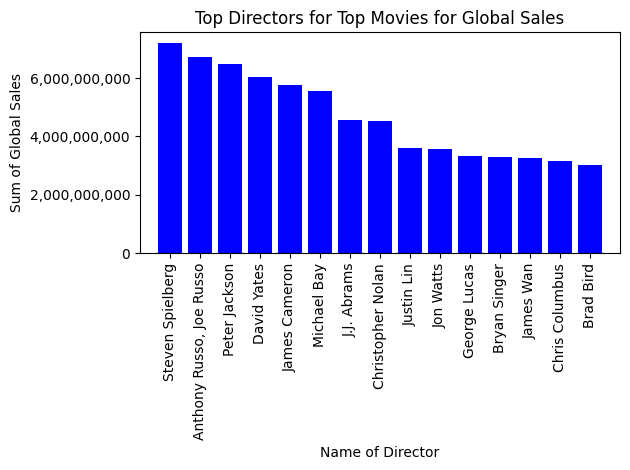

In [23]:
#dir_sum_df
dir_sum_ls = dir_sum_df.index.tolist()
dir_ws_ls = dir_sum_df["World Sales Sum"]
x_axis = np.arange(len(dir_ws_ls))

dir_sum_bar = plt.bar(x_axis, dir_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Sum of Global Sales")
plt.title("Top Directors for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/dir_sumBars.png", bbox_inches="tight")
plt.show()

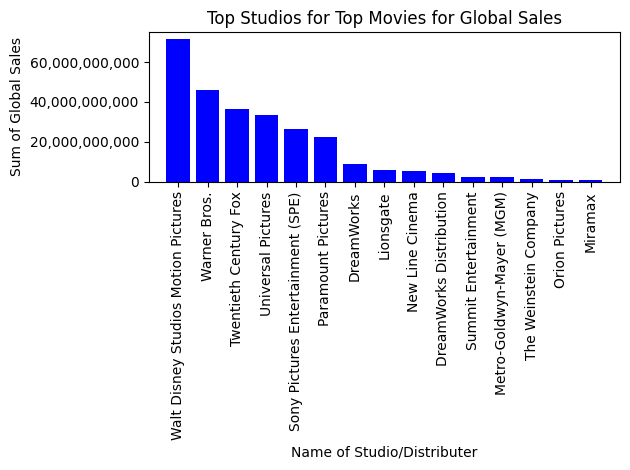

In [24]:
#stu_sum_df
stu_sum_bar = stu_sum_df

stu_sum_ls = stu_sum_df.index.tolist()
stu_ws_ls = stu_sum_df["World Sales Sum"]
x_axis = np.arange(len(stu_ws_ls))

stu_sum_bar = plt.bar(x_axis, stu_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio/Distributer")
plt.ylabel("Sum of Global Sales")
plt.title("Top Studios for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/stu_sumBars.png", bbox_inches="tight")
plt.show()


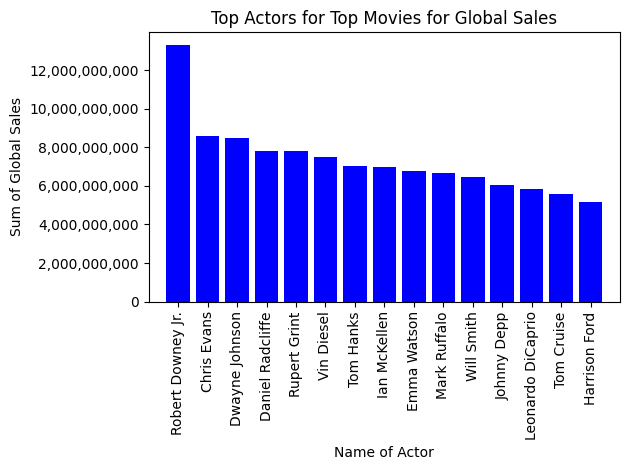

In [25]:
act_sum_bar = act_sum_df

act_sum_ls = act_sum_df.index.tolist()
act_ws_ls = act_sum_df["World Sales Sum"]
x_axis = np.arange(len(stu_ws_ls))

act_sum_bar = plt.bar(x_axis, act_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Sum of Global Sales")
plt.title("Top Actors for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/act_sumBars.png", bbox_inches="tight")
plt.show()


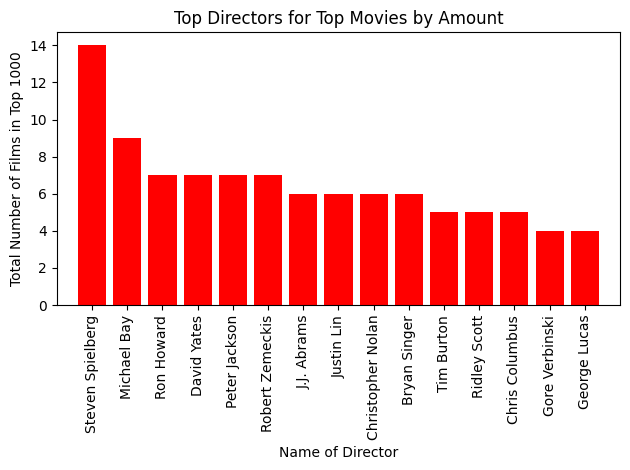

In [26]:
dir_num_ls = dir_num_df.index.tolist()
dir_wsa_ls = dir_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(dir_wsa_ls))

dir_num_bar = plt.bar(x_axis, dir_wsa_ls, color='r',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Directors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/dir_numBars.png", bbox_inches="tight")
plt.show()


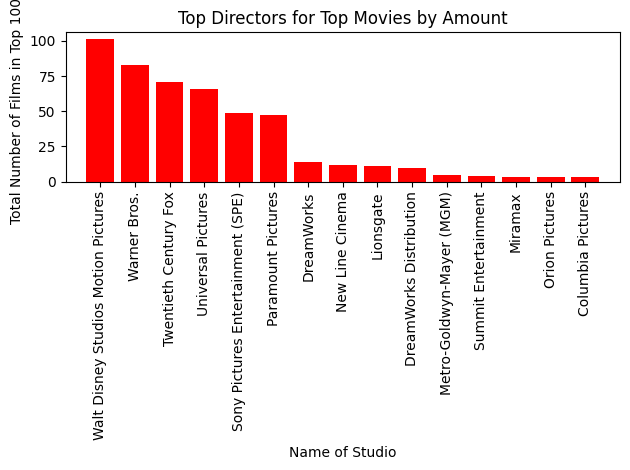

In [27]:
stu_num_ls = stu_num_df.index.tolist()
stu_wsa_ls = stu_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(stu_wsa_ls))

stu_num_bar = plt.bar(x_axis, stu_wsa_ls, color='r',alpha=1,align="center")
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Directors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/stu_numBars.png", bbox_inches="tight")
plt.show()


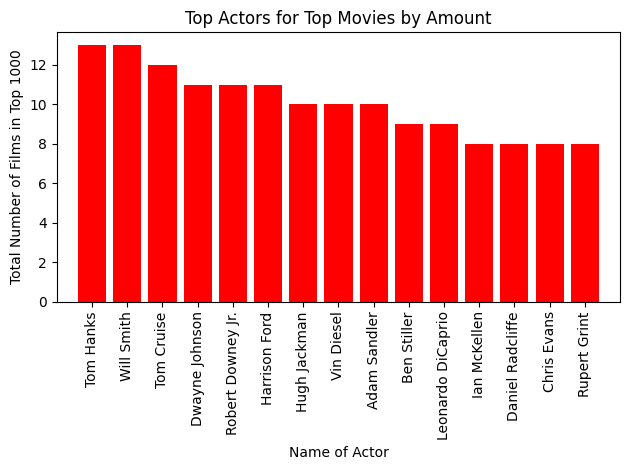

In [28]:
act_num_ls = act_num_df.index.tolist()
act_wsa_ls = act_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(act_wsa_ls))

act_num_bar = plt.bar(x_axis, act_wsa_ls, color='r',alpha=1,align="center")
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Actors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/act_numBars.png", bbox_inches="tight")
plt.show()


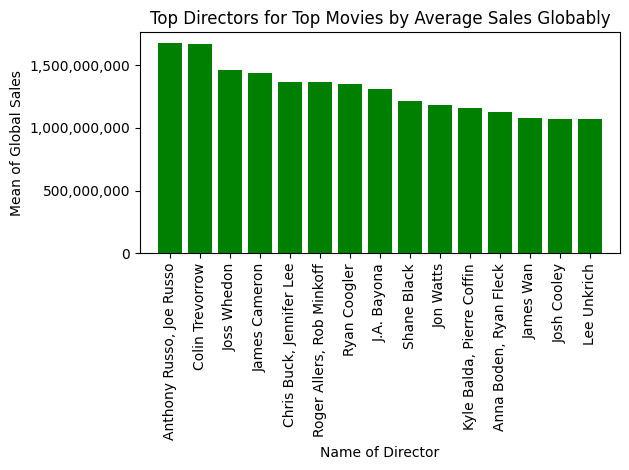

In [29]:
dir_mean_ls = dir_mean_df.index.tolist()
dir_wsm_ls = dir_mean_df["World Sales Mean"]
x_axis = np.arange(len(dir_wsm_ls))

dir_mean_bar = plt.bar(x_axis, dir_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Mean of Global Sales")
plt.title("Top Directors for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/dir_meanBars.png", bbox_inches="tight")
plt.show()


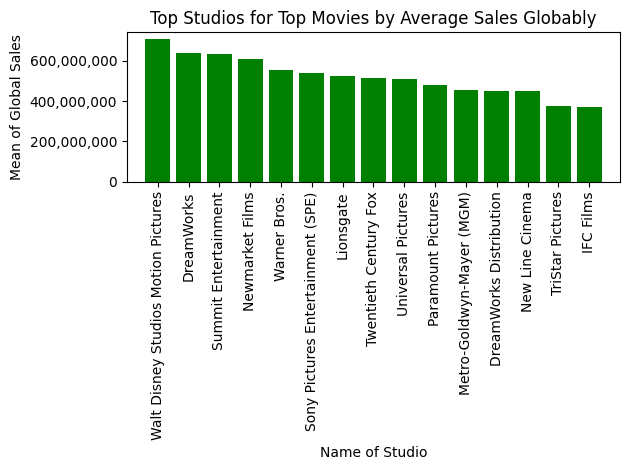

In [30]:
stu_mean_ls = stu_mean_df.index.tolist()
stu_wsm_ls = stu_mean_df["World Sales Mean"]
x_axis = np.arange(len(stu_wsm_ls))

stu_mean_bar = plt.bar(x_axis, stu_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio")
plt.ylabel("Mean of Global Sales")
plt.title("Top Studios for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/stu_meanBars.png", bbox_inches="tight")
plt.show()


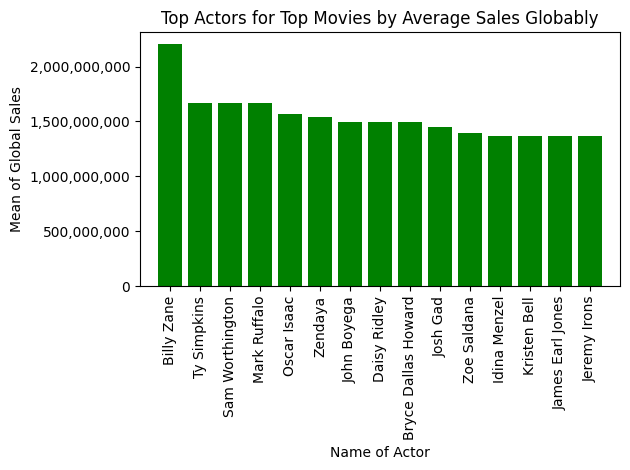

In [31]:
act_mean_ls = act_mean_df.index.tolist()
act_wsm_ls = act_mean_df["World Sales Mean"]
x_axis = np.arange(len(act_wsm_ls))

act_mean_bar = plt.bar(x_axis, act_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Mean of Global Sales")
plt.title("Top Actors for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/act_meanBars.png", bbox_inches="tight")
plt.show()


#### Based on the data, the simple answer for which director, studio, and actor has the best sales reveals that Steven Spielberg as a director has made the most in sales out of the top 1000 highest-grossing films, the Studio with the most sales is Disney, and the actor with the highest sales figures is Robert Downey Jr. This conclusion is reached by calculating the sum of gross global sales per person/company.

# Genre Percentage in Top Grossing

In [32]:
# Retrieve genre column
genres = full_moviels_df['Genre'] 

In [33]:
# Retrieve each genre
genre_ls = []
hold_ls = []
for genre in genres:
    hold_ls = genre.split(", ")
    for genre in hold_ls:
        genre_ls.append(genre)

In [34]:
# Clean data
genre1 = pd.DataFrame(genre_ls)
final_genre = genre1[0].str.replace('\W', '', regex=True)

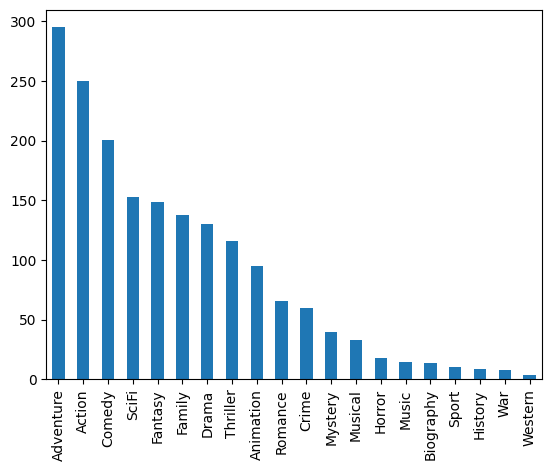

In [35]:
# bar chart of Genre Percentage in top grossing
genre = final_genre.value_counts()
genre.plot.bar()
plt.savefig("Output/bar_chart_genre.png", bbox_inches='tight')
plt.show()

# Genre Performance Over the Past Ten Years

In [36]:
#pull sales, year, and genre columns
genre_df = full_moviels_df[['World Sales', 'Year Released', 'Genre']]

In [37]:
# seperate genres into new columns

genre_df = pd.concat([genre_df, genre_df['Genre'].str.split(',', expand=True)], axis=1)
genre_df = genre_df.drop(columns = 'Genre')
#RM

In [38]:
# Pull data from 2009 to 2019
genre_df = genre_df.loc[genre_df['Year Released'] > 2008]
genre_df = genre_df.loc[genre_df['Year Released'] < 2020]

In [39]:
# label new columns

genres = {genre_df.columns[2]: 'Genre_1', 
          genre_df.columns[3]: 'Genre_2',
          genre_df.columns[4]: 'Genre_3',
          genre_df.columns[5]: 'Genre_4',
          genre_df.columns[6]: 'Genre_5',
          genre_df.columns[7]: 'Genre_6',
          genre_df.columns[8]: 'Genre_7',
          genre_df.columns[9]: 'Genre_8'
         }
genre_df = genre_df.rename(columns=genres)

In [40]:
# revmove special characters from genre cells

genre_df['Genre_1'] = genre_df['Genre_1'].str.replace('\W', '', regex=True)
genre_df['Genre_2'] = genre_df['Genre_2'].str.replace('\W', '', regex=True)
genre_df['Genre_3'] = genre_df['Genre_3'].str.replace('\W', '', regex=True)
genre_df['Genre_4'] = genre_df['Genre_4'].str.replace('\W', '', regex=True)
genre_df['Genre_5'] = genre_df['Genre_5'].str.replace('\W', '', regex=True)
genre_df['Genre_6'] = genre_df['Genre_6'].str.replace('\W', '', regex=True)
genre_df['Genre_7'] = genre_df['Genre_7'].str.replace('\W', '', regex=True)
genre_df['Genre_8'] = genre_df['Genre_8'].str.replace('\W', '', regex=True)

In [41]:
# sum the sales by year and genre
genre_1 = genre_df.groupby(['Year Released', 'Genre_1']).agg({'World Sales': 'sum'})
genre_1 = genre_1.reset_index()
genre_1 = genre_1.rename(columns={'Genre_1':'Genre'})

genre_2 = genre_df.groupby(['Year Released', 'Genre_2']).agg({'World Sales': 'sum'})
genre_2 = genre_2.reset_index()
genre_2 = genre_2.rename(columns={'Genre_2':'Genre'})

genre_3 = genre_df.groupby(['Year Released', 'Genre_3']).agg({'World Sales': 'sum'})
genre_3 = genre_3.reset_index()
genre_3 = genre_3.rename(columns={'Genre_3':'Genre'})

genre_4 = genre_df.groupby(['Year Released', 'Genre_4']).agg({'World Sales': 'sum'})
genre_4 = genre_4.reset_index()
genre_4 = genre_4.rename(columns={'Genre_4':'Genre'})

genre_5 = genre_df.groupby(['Year Released', 'Genre_5']).agg({'World Sales': 'sum'})
genre_5 = genre_5.reset_index()
genre_5 = genre_5.rename(columns={'Genre_5':'Genre'})

genre_6 = genre_df.groupby(['Year Released', 'Genre_6']).agg({'World Sales': 'sum'})
genre_6 = genre_6.reset_index()
genre_6 = genre_6.rename(columns={'Genre_6':'Genre'})

genre_7 = genre_df.groupby(['Year Released', 'Genre_7']).agg({'World Sales': 'sum'})
genre_7 = genre_7.reset_index()
genre_7 = genre_7.rename(columns={'Genre_7':'Genre'})

genre_8 = genre_df.groupby(['Year Released', 'Genre_8']).agg({'World Sales': 'sum'})
genre_8 = genre_8.reset_index()
genre_8 = genre_8.rename(columns={'Genre_8':'Genre'})

# reset index in order to rename genre columns for merging all info
final_genre = pd.concat([genre_1,
                         genre_2,
                         genre_3,
                         genre_4,
                         genre_5,
                         genre_6,
                         genre_7,
                         genre_8]).groupby(['Year Released','Genre']).sum().reset_index()

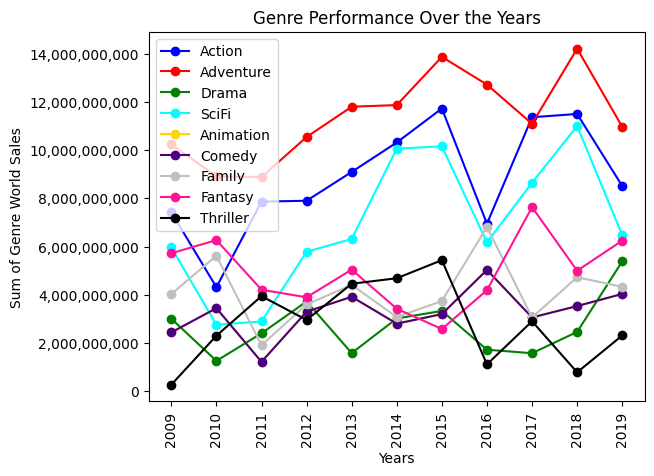

In [42]:
# Retrieve Action world sales
final_action = final_genre.loc[final_genre['Genre'] == 'Action']
action_y_values = final_action['World Sales']
x_values = final_action['Year Released']

# Adventure world sales
final_adventure = final_genre.loc[final_genre['Genre'] == 'Adventure']
adventure_y_values = final_adventure['World Sales']

#Drama world sales
final_drama = final_genre.loc[final_genre['Genre'] == 'Drama']
drama_y_values = final_drama['World Sales']

#SciFi world sales
final_scifi = final_genre.loc[final_genre['Genre'] == 'SciFi']
scifi_y_values = final_scifi['World Sales']

# Animation world sales
final_animation = final_genre.loc[final_genre['Genre'] == 'Animation']
animation_y_values = final_animation['World Sales']

# Comedy world sales
final_comedy = final_genre.loc[final_genre['Genre'] == 'Comedy']
comedy_y_values = final_comedy['World Sales']

# Family world sales
final_family = final_genre.loc[final_genre['Genre'] == 'Family']
family_y_values = final_family['World Sales']

# Fantasy world sales
final_fantasy = final_genre.loc[final_genre['Genre'] == 'Fantasy']
fantasy_y_values = final_fantasy['World Sales']

# Thriller world sales
final_thriller = final_genre.loc[final_genre['Genre'] == 'Thriller']
thriller_y_values = final_thriller['World Sales']


#plot lines
action_plot = plt.plot(x_values, action_y_values, marker ='o', color='blue', label="Action")
adventure_y_plot = plt.plot(x_values, adventure_y_values, marker ='o', color='red', label="Adventure")
drama_y_plot = plt.plot(x_values, drama_y_values, marker ='o', color='green', label="Drama")
scifi_yplot = plt.plot(x_values, scifi_y_values, marker ='o', color='cyan', label="SciFi")
animation_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='gold', label="Animation")
comedy_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='indigo', label="Comedy")
family_yplot = plt.plot(x_values, family_y_values, marker ='o', color='silver', label="Family")
fantasy_yplot = plt.plot(x_values, fantasy_y_values, marker ='o', color='deeppink', label="Fantasy")
thriller_yplot = plt.plot(x_values, thriller_y_values, marker ='o', color='black', label="Thriller")

# creating plot
plt.legend(loc="upper left") # plot legend
plt.ticklabel_format(style='plain') # remove scientic notation
# titles
plt.title("Genre Performance Over the Years")
plt.xlabel("Years")
plt.ylabel("Sum of Genre World Sales")
plt.xticks(x_values, rotation=90) # show all x values and rotate
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
plt.savefig("Output/genre_sum.png", bbox_inches='tight')
plt.show()

In [43]:
# average world sales
genre_1m = genre_df.groupby(['Year Released', 'Genre_1']).agg({'World Sales': 'mean'})
genre_1m = genre_1m.reset_index()
genre_1m = genre_1m.rename(columns={'Genre_1':'Genre'})

genre_2m = genre_df.groupby(['Year Released', 'Genre_2']).agg({'World Sales': 'mean'})
genre_2m = genre_2m.reset_index()
genre_2m = genre_2m.rename(columns={'Genre_2':'Genre'})

genre_3m = genre_df.groupby(['Year Released', 'Genre_3']).agg({'World Sales': 'mean'})
genre_3m = genre_3m.reset_index()
genre_3m = genre_3m.rename(columns={'Genre_3':'Genre'})

genre_4m = genre_df.groupby(['Year Released', 'Genre_4']).agg({'World Sales': 'mean'})
genre_4m = genre_4m.reset_index()
genre_4m = genre_4m.rename(columns={'Genre_4':'Genre'})

genre_5m = genre_df.groupby(['Year Released', 'Genre_5']).agg({'World Sales': 'mean'})
genre_5m = genre_5m.reset_index()
genre_5m = genre_5m.rename(columns={'Genre_5':'Genre'})

genre_6m = genre_df.groupby(['Year Released', 'Genre_6']).agg({'World Sales': 'mean'})
genre_6m = genre_6m.reset_index()
genre_6m = genre_6m.rename(columns={'Genre_6':'Genre'})

genre_7m = genre_df.groupby(['Year Released', 'Genre_7']).agg({'World Sales': 'mean'})
genre_7m = genre_7m.reset_index()
genre_7m = genre_7m.rename(columns={'Genre_7':'Genre'})

genre_8m = genre_df.groupby(['Year Released', 'Genre_8']).agg({'World Sales': 'mean'})
genre_8m = genre_8m.reset_index()
genre_8m = genre_8m.rename(columns={'Genre_8':'Genre'})

# reset index in order to rename genre columns for merging all info
final_genre = pd.concat([genre_1m,
                         genre_2m,
                         genre_3m,
                         genre_4m,
                         genre_5m,
                         genre_6m,
                         genre_7m,
                         genre_8m]).groupby(['Year Released','Genre']).sum().reset_index()

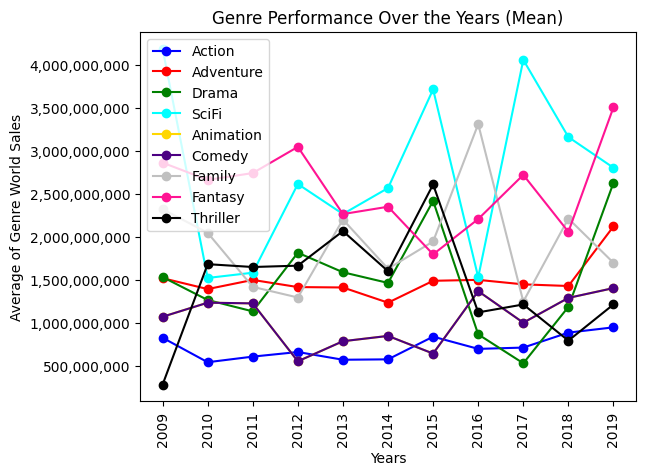

In [44]:
# Retrieve Action world sales
final_action = final_genre.loc[final_genre['Genre'] == 'Action']
action_y_values = final_action['World Sales']
x_values = final_action['Year Released']

# Adventure world sales
final_adventure = final_genre.loc[final_genre['Genre'] == 'Adventure']
adventure_y_values = final_adventure['World Sales']

#Drama world sales
final_drama = final_genre.loc[final_genre['Genre'] == 'Drama']
drama_y_values = final_drama['World Sales']

#SciFi world sales
final_scifi = final_genre.loc[final_genre['Genre'] == 'SciFi']
scifi_y_values = final_scifi['World Sales']

# Animation world sales
final_animation = final_genre.loc[final_genre['Genre'] == 'Animation']
animation_y_values = final_animation['World Sales']

# Comedy world sales
final_comedy = final_genre.loc[final_genre['Genre'] == 'Comedy']
comedy_y_values = final_comedy['World Sales']

# Family world sales
final_family = final_genre.loc[final_genre['Genre'] == 'Family']
family_y_values = final_family['World Sales']

# Fantasy world sales
final_fantasy = final_genre.loc[final_genre['Genre'] == 'Fantasy']
fantasy_y_values = final_fantasy['World Sales']

# Thriller world sales
final_thriller = final_genre.loc[final_genre['Genre'] == 'Thriller']
thriller_y_values = final_thriller['World Sales']


#plot lines
action_plot = plt.plot(x_values, action_y_values, marker ='o', color='blue', label="Action")
adventure_y_plot = plt.plot(x_values, adventure_y_values, marker ='o', color='red', label="Adventure")
drama_y_plot = plt.plot(x_values, drama_y_values, marker ='o', color='green', label="Drama")
scifi_yplot = plt.plot(x_values, scifi_y_values, marker ='o', color='cyan', label="SciFi")
animation_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='gold', label="Animation")
comedy_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='indigo', label="Comedy")
family_yplot = plt.plot(x_values, family_y_values, marker ='o', color='silver', label="Family")
fantasy_yplot = plt.plot(x_values, fantasy_y_values, marker ='o', color='deeppink', label="Fantasy")
thriller_yplot = plt.plot(x_values, thriller_y_values, marker ='o', color='black', label="Thriller")

# creating plot
plt.legend(loc="upper left") # plot legend
plt.ticklabel_format(style='plain') # remove scientic notation
# titles
plt.title("Genre Performance Over the Years (Mean)")
plt.xlabel("Years")
plt.ylabel("Average of Genre World Sales")
plt.xticks(x_values, rotation=90) # show all x values and rotate
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
plt.savefig("Output/genre_mean.png", bbox_inches='tight')
plt.show()

#### Action and adventure appeared the most in the dataset of the highest grossing movies. Sci-Fi and Fantasy had a higher box office average, however the data is inconsistent as the line plot increases and decreases significantly from year to year. Action and adventure have the highest sum box office, which emphasizes earlier data that there is a higher number of these movies performing in the top films, and the line plot revealed a more consistent average from year to year. Adventure and action were the most successful and consistent genres to produce.

# Movie Rating vs Sales

In [45]:
rate_count = full_moviels_df["Rating"].value_counts()

In [46]:
#DataFrame for Total sales from a rating
rated_and_sales = full_moviels_df.set_index(['Rating'])['World Sales']
rate_type_avg_sales = full_moviels_df.groupby(["Rating"]).mean()["World Sales"]
rate_type_sales_overall = full_moviels_df.groupby(["Rating"]).sum()["World Sales"]



type_summary=pd.DataFrame({
                          'Total Sales Per Type':rate_type_sales_overall,
                            })
type_summary

,Total Sales Per Type
Rating,
18+,354825435
Approved,184925486
G,16917497010
PG,67379279430
PG-13,157811622067
R,31030184041


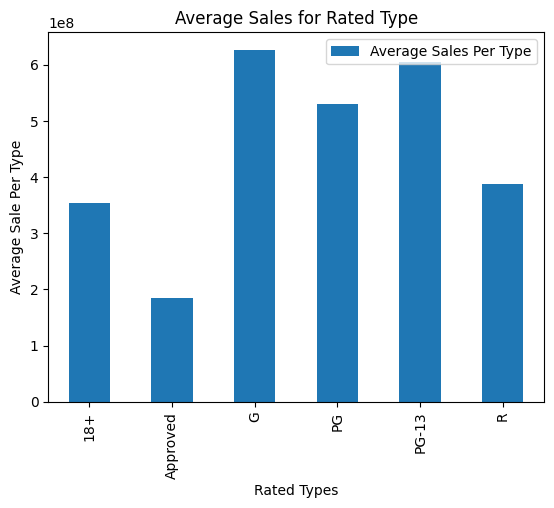

In [47]:
#Bar chart for Average sales per Rating type
rated_and_sales_avg = full_moviels_df.set_index(['Rating'])['World Sales']


avg_summary =pd.DataFrame({"Average Sales Per Type":rate_type_avg_sales})

Average_summary=avg_summary.plot.bar()
plt.xlabel("Rated Types")
plt.ylabel("Average Sale Per Type")
plt.title("Average Sales for Rated Type")
plt.savefig("Output/sales_per_rated_type.png", bbox_inches='tight')

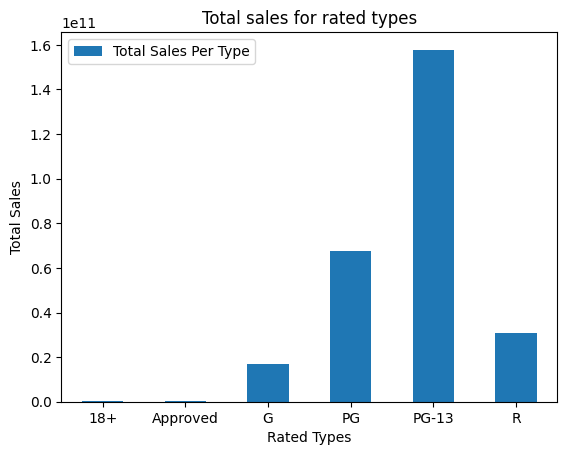

In [48]:
overall_sale_by_rate_type=type_summary.plot.bar()

plt.xlabel("Rated Types")
plt.ylabel("Total Sales")
plt.title("Total sales for rated types")
plt.xticks(rotation=360)
plt.savefig("Output/Sales_Overall.png", bbox_inches='tight')

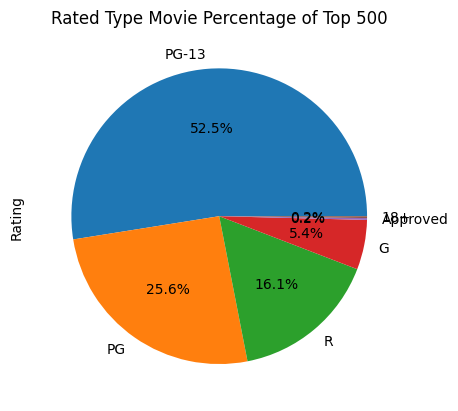

In [49]:
#pie chart for percentage of rated type in top 500 EP
plt.title("Rated Type Movie Percentage of Top 500")
rate_count.plot.pie(autopct= "%1.1f%%")


plt.savefig("Output/Rate_Percent_500.png", bbox_inches='tight')
plt.show()

#### Most of the movies in the top 500 are PG-13. The data we have put together shows that PG-13 and G on average per rating earn the highest amount of money. This may be because family friendly films may appeal to a wider audience. 

# Reception vs Sales

In [50]:
score_df = pd.read_csv("Output/Movie_Data.csv")

In [51]:
# Formatting with a function that calls a loop
# this one removes the percentage signs
# further, data types are inconsistent
def format_score(x):
    if '%' in x:# removes the percentage sign
        return x.split('%')[0]
    elif '/' in x:# this one was for those'XX/100'
        return x.split('/')[0]
    elif '–' in x:# the split one
        return x.split('–')[0] #the wierd one 
    elif x is None:
        return None

In [52]:
# Call the above formula, the idea for mapping and using lambda
# came from a previous tutoring session
score_df["Rotten Tomatoes Score"] = score_df["Rotten Tomatoes Score"].map(lambda x: format_score(x))
score_df["Rotten Tomatoes Score"] = pd.to_numeric(score_df["Rotten Tomatoes Score"])

In [53]:
# Formatting the IMDB scores
score_df['IMDB Score'] = score_df.apply(lambda x: x['IMDB Score'] * 10, axis=1)

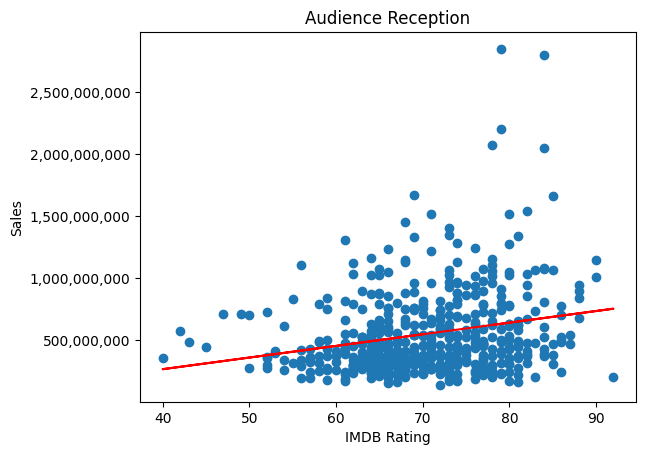

In [54]:
# sales (y value)
plt.scatter(score_df['IMDB Score'], score_df['World Sales'
                                ])
# line of regression
x_values = score_df['IMDB Score']
y_values = score_df['World Sales']
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales")
plt.xlabel("IMDB Rating")
plt.title('Audience Reception')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('Output/audience_score.png', bbox_inches='tight')

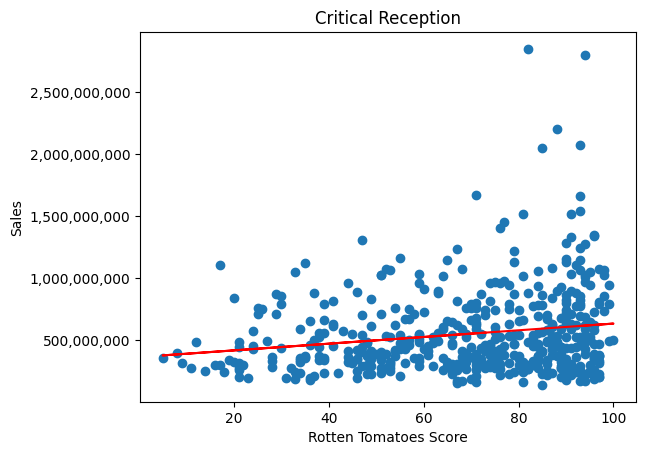

In [55]:
# isolate audience response (rotten Tomatoes)
# sales (y value)
plt.scatter(score_df['Rotten Tomatoes Score'], score_df['World Sales'
                                ])
# sales (y value)

# line of regression
x_values = score_df['Rotten Tomatoes Score']
y_values = score_df['World Sales']
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales")
plt.xlabel("Rotten Tomatoes Score")
plt.title('Critical Reception')
plt.savefig('Output/critical_score.png', bbox_inches='tight')

#### There seems to be no direct correlation between ratings and worldwide earnings. More research is need to understand the relation between critical scores and audience scores.